# Titanic Case Study

# Variable Notes

- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.

# Perform followings on dataset:
- Read the dataset and display top/bottom rows
- Get a summary of whole dataset
- Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?
- Drop those columns which needs to be dropped
- Find out the data type of each column
- Find out the number of entries in each column
- Find out which columns is having more number of missing values
- Replace missing values in each column and provide the reason for choosing one function to replace missing values
- Fix the issue with fare column usign regex flag then type casting of the whole column 
- Find out total number of Male/Female passengers
- Find out total number of passengers in each passenger class
- Find out total number of Survived/Not-survived passengers
- Find out total number of passengers of various age groups (0-30, 31-60 and >60)
- Find out which age group survived
- Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### Read the dataset and display top/bottom rows

In [2]:
df = pd.read_csv("titanic_dataset_modified.csv")
df.head()

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,$151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,$151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,$151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.tail(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1307,1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,$7.23,NaN,C,NaN,NaN,NaN
1308,1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,$7.88,NaN,S,NaN,NaN,NaN


###### Get a summary of whole dataset

In [4]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,121.000000
mean,654.000000,2.294882,0.381971,29.881135,0.498854,0.385027,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,97.696922
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,1.000000
25%,327.000000,2.000000,0.000000,21.000000,0.000000,0.000000,72.000000
50%,654.000000,3.000000,0.000000,28.000000,0.000000,0.000000,155.000000
75%,981.000000,3.000000,1.000000,39.000000,1.000000,0.000000,256.000000
max,1308.000000,3.000000,1.000000,80.000000,8.000000,9.000000,328.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Unnamed: 0    1309 non-null int64
pclass        1309 non-null int64
survived      1309 non-null int64
name          1309 non-null object
gender        1309 non-null object
age           1046 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
ticket        1309 non-null object
fare          1308 non-null object
cabin         295 non-null object
embarked      1307 non-null object
boat          486 non-null object
body          121 non-null float64
home.dest     745 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 153.5+ KB


###### Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?

In [6]:
df.head(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


###### Drop those columns which needs to be dropped

In [9]:
df.drop(["Unnamed: 0","name","ticket","cabin","boat","body","home.dest"],axis=1,inplace=True)
# inplace is used to update original dataframe

In [10]:
df.head(2)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,$211.34,S
1,1,1,male,0.9167,1,2,$151.55,S


###### Find out the data type of each column

In [11]:
df.dtypes

pclass        int64
survived      int64
gender       object
age         float64
sibsp         int64
parch         int64
fare         object
embarked     object
dtype: object

In [15]:
df.pclass.dtype

dtype('int64')

###### to get all column names

In [16]:
df.columns

Index(['pclass', 'survived', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [17]:
df.keys()

Index(['pclass', 'survived', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

###### Find out the number of entries in each column

In [24]:
for k in df.columns: # df.keys()
    print("Number of entries in _{}_ is :: {}".format(k,df[k].count()))

Number of entries in _pclass_ is :: 1309
Number of entries in _survived_ is :: 1309
Number of entries in _gender_ is :: 1309
Number of entries in _age_ is :: 1046
Number of entries in _sibsp_ is :: 1309
Number of entries in _parch_ is :: 1309
Number of entries in _fare_ is :: 1308
Number of entries in _embarked_ is :: 1307


In [22]:
# using size

In [25]:
for k in df.columns: # df.keys()
    print("Number of entries in _{}_ is :: {}".format(k,df[k].size))

Number of entries in _pclass_ is :: 1309
Number of entries in _survived_ is :: 1309
Number of entries in _gender_ is :: 1309
Number of entries in _age_ is :: 1309
Number of entries in _sibsp_ is :: 1309
Number of entries in _parch_ is :: 1309
Number of entries in _fare_ is :: 1309
Number of entries in _embarked_ is :: 1309


###### diff b/w size and count

In [ ]:
# size: will count non-null + null values
# count: will count only non-null values

###### Find out which columns is having more number of missing values

In [29]:
round(100.2736423,3)

100.274

In [31]:
for k in df.columns: # df.keys()
    val = ((df[k].size-df[k].count())/df[k].size)*100
    print("% of missing values in _{}_ is :: {:.2f}".format(k,val))

% of missing values in _pclass_ is :: 0.00
% of missing values in _survived_ is :: 0.00
% of missing values in _gender_ is :: 0.00
% of missing values in _age_ is :: 20.09
% of missing values in _sibsp_ is :: 0.00
% of missing values in _parch_ is :: 0.00
% of missing values in _fare_ is :: 0.08
% of missing values in _embarked_ is :: 0.15


In [32]:
for k in df.columns: # df.keys()
    val = ((df[k].size-df[k].count())/df[k].size)*100
    if val >20.:
        print("% of missing values in _{}_ is :: {:.2f}".format(k,val))

% of missing values in _age_ is :: 20.09


###### Replace missing values in each column and provide the reason for choosing one function to replace missing values

In [35]:
# To see outliars

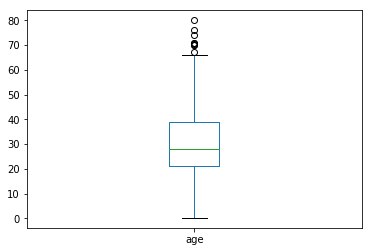

In [34]:
df.age.plot(kind="box")

###### using isnull()

In [38]:
df.age.isnull().sum()

263

In [39]:
df.embarked.isnull().sum()

2

In [40]:
df.fare.isnull().sum()

1

In [45]:
# for age column

In [41]:
df.age.mean()

29.8811345124283

In [43]:
df.age.fillna(df.age.mean(),inplace=True)

In [44]:
df.age.isnull().sum()

0

In [46]:
# for embarked column

In [48]:
df.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [49]:
df.embarked.nunique()

3

In [50]:
df.embarked.mode()

0    S
dtype: object

In [51]:
df.embarked.mode()[0]

'S'

In [52]:
df.embarked.fillna(df.embarked.mode()[0],inplace=True)

In [53]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [54]:
df.embarked.isnull().sum()

0

In [55]:
# How ot get the count of each unique value

In [56]:
df.embarked.value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

###### Fix the issue with fare column usign regex flag then type casting of the whole column

In [59]:
df.fare.head(2)

0    $211.34
1    $151.55
Name: fare, dtype: object

In [58]:
df.fare.dtype

dtype('O')

In [60]:
df.fare.isnull().sum()

1

In [65]:
df.replace({"\$":""},regex=True,inplace=True)

In [66]:
df.fare.head(2)

0    211.34
1    151.55
Name: fare, dtype: object

In [68]:
df.fare = df.fare.astype("float64")

In [69]:
df.fare.fillna(df.fare.mean(),inplace=True)

In [70]:
df.fare.isnull().sum()

0

In [71]:
df.isnull().sum()

pclass      0
survived    0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [72]:
df.dtypes

pclass        int64
survived      int64
gender       object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [73]:
df.head()

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.34,S
1,1,1,male,0.9167,1,2,151.55,S
2,1,0,female,2.0000,1,2,151.55,S
3,1,0,male,30.0000,1,2,151.55,S
4,1,0,female,25.0000,1,2,151.55,S


In [74]:
df.to_csv("titanic_clean.csv")
df.to_html("titanic_clean.html")
df.to_json("titanic_clean.json")

###### Find out total number of Male/Female passengers

In [75]:
df.gender.value_counts()

male      843
female    466
Name: gender, dtype: int64

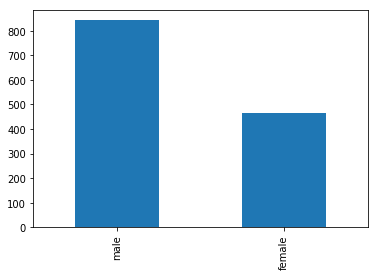

In [76]:
df.gender.value_counts().plot(kind="bar")

###### Find out total number of passengers in each passenger class

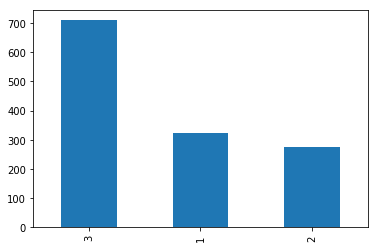

In [77]:
df.pclass.value_counts().plot(kind="bar")

In [80]:
# df[df.gender=="male"]

###### Find out total number of Survived/Not-survived passengers

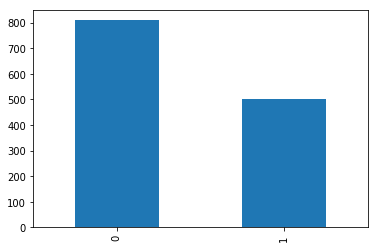

In [81]:
df.survived.value_counts().plot(kind="bar")

###### Find out total number of passengers of various age groups (0-30, 31-60 and >60)

In [90]:
ag1 = df.age[df.age<=30]
ag2 = df.age[(df.age>30) & (df.age<=60)]
ag3 = df.age[df.age>60]
print(ag1.size)
print(ag2.size)
print(ag3.size)

872
404
33


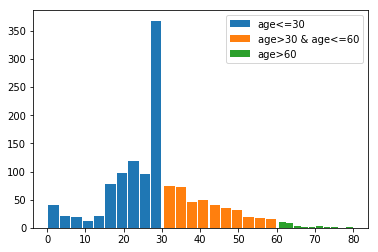

In [88]:
plt.hist(ag1,rwidth=.9,label="age<=30")
plt.hist(ag2,rwidth=.9,label="age>30 & age<=60")
plt.hist(ag3,rwidth=.9,label="age>60")
plt.legend()
plt.show()

###### Find out which age group survived

In [91]:
# try at home

# Groupby concept

In [92]:
grp = df.groupby(["pclass","embarked"])

In [93]:
grp

In [94]:
grp.groups

{(1, 'C'): Int64Index([  9,  10,  11,  12,  16,  17,  18,  19,  22,  23,
             ...
             303, 304, 308, 312, 313, 314, 316, 317, 319, 322],
            dtype='int64', length=141),
 (1, 'Q'): Int64Index([206, 207, 208], dtype='int64'),
 (1, 'S'): Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  13,
             ...
             305, 306, 307, 309, 310, 311, 315, 318, 320, 321],
            dtype='int64', length=179),
 (2,
  'C'): Int64Index([323, 324, 391, 392, 401, 402, 465, 478, 479, 480, 481, 482, 485,
             491, 492, 493, 494, 495, 512, 513, 520, 524, 526, 531, 538, 539,
             547, 566],
            dtype='int64'),
 (2, 'Q'): Int64Index([469, 470, 472, 477, 487, 511, 562], dtype='int64'),
 (2, 'S'): Int64Index([325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
             ...
             590, 591, 592, 593, 594, 595, 596, 597, 598, 599],
            dtype='int64', length=242),
 (3,
  'C'): Int64Index([ 607,  613,  647,  648,  650,  651,  653,  

In [95]:
grp.get_group((1, 'C'))

,pclass,survived,gender,age,sibsp,parch,fare,embarked
9,1,0,male,71.000000,0,0,49.50,C
10,1,0,male,47.000000,1,0,227.53,C
11,1,1,female,18.000000,1,0,227.53,C
12,1,1,female,24.000000,0,0,69.30,C
16,1,0,male,24.000000,0,1,247.52,C
17,1,1,female,50.000000,0,1,247.52,C
18,1,1,female,32.000000,0,0,76.29,C
19,1,0,male,36.000000,0,0,75.24,C
22,1,1,male,26.000000,0,0,30.00,C
23,1,1,female,42.000000,0,0,227.53,C


In [100]:
grp.get_group((1, 'C')).age.count()

141

In [101]:
grp.groups.keys()

dict_keys([(1, 'C'), (1, 'Q'), (1, 'S'), (2, 'C'), (2, 'Q'), (2, 'S'), (3, 'C'), (3, 'Q'), (3, 'S')])

###### Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [103]:
for k in grp.groups.keys():
    #print(k)
    print("Total number in group {} is :: {}".format(k,grp.get_group(k).pclass.count()))

Total number in group (1, 'C') is :: 141
Total number in group (1, 'Q') is :: 3
Total number in group (1, 'S') is :: 179
Total number in group (2, 'C') is :: 28
Total number in group (2, 'Q') is :: 7
Total number in group (2, 'S') is :: 242
Total number in group (3, 'C') is :: 101
Total number in group (3, 'Q') is :: 113
Total number in group (3, 'S') is :: 495


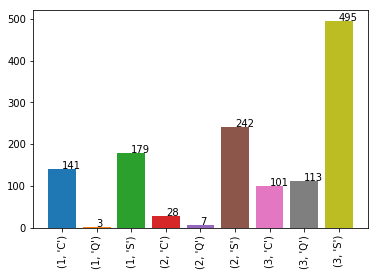

In [108]:
for k in grp.groups.keys():
    #print(k)
    plt.bar(str(k),grp.get_group(k).pclass.count())
    plt.text(str(k),grp.get_group(k).pclass.count(),grp.get_group(k).pclass.count())
plt.xticks(rotation=90)
plt.show()

# Sorting

In [135]:
a = np.random.randint(1,30,15).reshape(5,3)
df1 = pd.DataFrame(a,columns=['A','B','C'])
df1

,A,B,C
0,14,8,22
1,11,12,19
2,28,21,6
3,21,10,17
4,18,20,27


In [136]:
df1.sort_index()

,A,B,C
0,14,8,22
1,11,12,19
2,28,21,6
3,21,10,17
4,18,20,27


In [137]:
df1.sort_index(axis=0,ascending=False)

,A,B,C
4,18,20,27
3,21,10,17
2,28,21,6
1,11,12,19
0,14,8,22


In [138]:
df1.sort_values(by="A")

,A,B,C
1,11,12,19
0,14,8,22
4,18,20,27
3,21,10,17
2,28,21,6


In [139]:
df1.sort_values(by="B",ascending=False)

,A,B,C
2,28,21,6
4,18,20,27
1,11,12,19
3,21,10,17
0,14,8,22


In [143]:
df1

,A,B,C
0,14,8,22
1,11,12,19
2,28,21,6
3,21,10,17
4,18,20,27


In [140]:
df1.sort_values(by=["A","B"],ascending=False)

,A,B,C
2,28,21,6
3,21,10,17
4,18,20,27
0,14,8,22
1,11,12,19


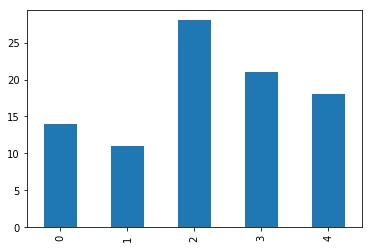

In [141]:
df1.A.plot(kind="bar")

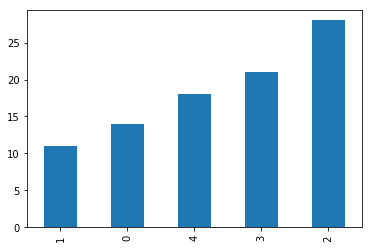

In [142]:
df2 = df1.sort_values(by="A")
df2.A.plot(kind="bar")

# concat

In [144]:
a = np.random.randint(1,30,15).reshape(5,3)
b = np.random.randint(1,10,15).reshape(5,3)
df1 = pd.DataFrame(a,columns=['A','B','C'])
df2 = pd.DataFrame(b,columns=['D','E','F'])

In [145]:
df1

,A,B,C
0,26,22,10
1,8,10,16
2,8,16,27
3,12,28,22
4,7,27,23


In [146]:
df2

,D,E,F
0,9,3,5
1,8,1,4
2,2,7,8
3,8,6,1
4,3,7,6


In [147]:
pd.concat([df1,df2])

/Users/vigneshkarthick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,E,F
0,26.0,22.0,10.0,NaN,NaN,NaN
1,8.0,10.0,16.0,NaN,NaN,NaN
2,8.0,16.0,27.0,NaN,NaN,NaN
3,12.0,28.0,22.0,NaN,NaN,NaN
4,7.0,27.0,23.0,NaN,NaN,NaN
0,NaN,NaN,NaN,9.0,3.0,5.0
1,NaN,NaN,NaN,8.0,1.0,4.0
2,NaN,NaN,NaN,2.0,7.0,8.0
3,NaN,NaN,NaN,8.0,6.0,1.0
4,NaN,NaN,NaN,3.0,7.0,6.0


In [149]:
pd.concat([df1,df2],axis=1)

,A,B,C,D,E,F
0,26,22,10,9,3,5
1,8,10,16,8,1,4
2,8,16,27,2,7,8
3,12,28,22,8,6,1
4,7,27,23,3,7,6


In [150]:
a = np.random.randint(1,30,15).reshape(5,3)
b = np.random.randint(1,10,15).reshape(5,3)
df1 = pd.DataFrame(a,columns=['A','B','C'])
df2 = pd.DataFrame(b,columns=['A','B','C'])

In [155]:
pd.concat([df1,df2],axis=0,ignore_index=True)

,A,B,C
0,16,25,12
1,9,1,20
2,18,20,10
3,24,22,18
4,15,5,24
5,6,8,1
6,7,4,9
7,1,1,3
8,3,7,2
9,7,3,8


# Merge

In [156]:
a = np.random.randint(1,30,15).reshape(5,3)
b = np.random.randint(1,10,15).reshape(5,3)
df1 = pd.DataFrame(a,columns=['A','B','C'])
df2 = pd.DataFrame(b,columns=['D','E','F'])

In [159]:
df1

,A,B,C
0,21,27,29
1,11,15,2
2,1,6,26
3,6,19,28
4,26,26,19


In [160]:
df2

,D,E,F
0,3,1,2
1,2,3,8
2,1,8,8
3,7,6,3
4,2,9,7


In [161]:
df1.merge(df2,left_on="A",right_on="D",how="inner")

,A,B,C,D,E,F
0,1,6,26,1,8,8


In [162]:
df1.merge(df2,left_on="A",right_on="D",how="left")

,A,B,C,D,E,F
0,21,27,29,NaN,NaN,NaN
1,11,15,2,NaN,NaN,NaN
2,1,6,26,1.0,8.0,8.0
3,6,19,28,NaN,NaN,NaN
4,26,26,19,NaN,NaN,NaN


In [163]:
df1.merge(df2,left_on="A",right_on="D",how="right")

,A,B,C,D,E,F
0,1.0,6.0,26.0,1,8,8
1,NaN,NaN,NaN,3,1,2
2,NaN,NaN,NaN,2,3,8
3,NaN,NaN,NaN,2,9,7
4,NaN,NaN,NaN,7,6,3


In [165]:
df1.merge(df2,left_on="A",right_on="D",how="outer",indicator=True)

,A,B,C,D,E,F,_merge
0,21.0,27.0,29.0,NaN,NaN,NaN,left_only
1,11.0,15.0,2.0,NaN,NaN,NaN,left_only
2,1.0,6.0,26.0,1.0,8.0,8.0,both
3,6.0,19.0,28.0,NaN,NaN,NaN,left_only
4,26.0,26.0,19.0,NaN,NaN,NaN,left_only
5,NaN,NaN,NaN,3.0,1.0,2.0,right_only
6,NaN,NaN,NaN,2.0,3.0,8.0,right_only
7,NaN,NaN,NaN,2.0,9.0,7.0,right_only
8,NaN,NaN,NaN,7.0,6.0,3.0,right_only


# Some image operation

In [166]:
im = plt.imread("three.png")
im

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [167]:
im.shape

(300, 300, 4)

In [170]:
im1 = im[:,:,0]
im1.shape

(300, 300)

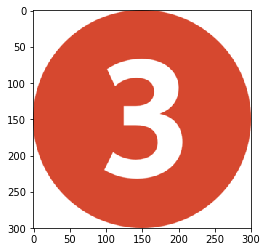

In [169]:
plt.imshow(im,cmap="gray")

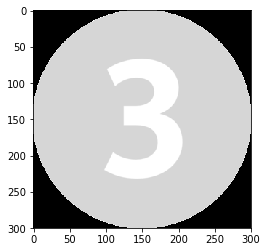

In [171]:
plt.imshow(im1,cmap="gray")

In [174]:
im1[80:230,90:220] = 255

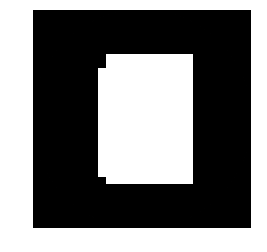

In [176]:
plt.imshow(im1,cmap="gray")
plt.axis("off")
plt.show()